**Step 1: Load and Explore the Data**

● Load the dataset using Pandas. 

● Explore the structure and summary statistics of the dataset. 

● Visualize the distribution of features using histograms or pair plots.

**1. Load the Dataset**

In [4]:
import pandas as pd
data = pd.read_csv("force2020_data.csv")

print(data.head())


       RHOB         GR  DEPTH_MD  NPHI        PEF         DTC
0  1.884186  80.200851   494.528   NaN  20.915468  161.131180
1  1.889794  79.262886   494.680   NaN  19.383013  160.603470
2  1.896523  74.821999   494.832   NaN  22.591518  160.173615
3  1.891913  72.878922   494.984   NaN  32.191910  160.149429
4  1.880034  71.729141   495.136   NaN  38.495632  160.128342


**2. Explore the Structure and Summary Statistics**

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB
None


In [6]:
print(data.describe())

               RHOB            GR      DEPTH_MD          NPHI           PEF  \
count  18270.000000  18270.000000  18270.000000  14032.000000  16440.000000   
mean       2.110451     63.847477   1883.228478      0.404547      3.463851   
std        0.297725     28.636331    801.941195      0.133532      2.561239   
min        1.404576      6.191506    494.528000      0.024330      1.010027   
25%        1.963399     43.866690   1188.750000      0.315346      2.320836   
50%        2.055079     66.777851   1882.972000      0.448527      2.790249   
75%        2.381963     81.542681   2577.802000      0.506343      4.267342   
max        2.927888    499.022583   3272.024000      0.800262     66.030319   

                DTC  
count  18189.000000  
mean     125.106178  
std       30.618337  
min       55.726753  
25%       90.883087  
50%      141.300461  
75%      148.048355  
max      175.953140  


**3.Visualize the Distribution of Features**

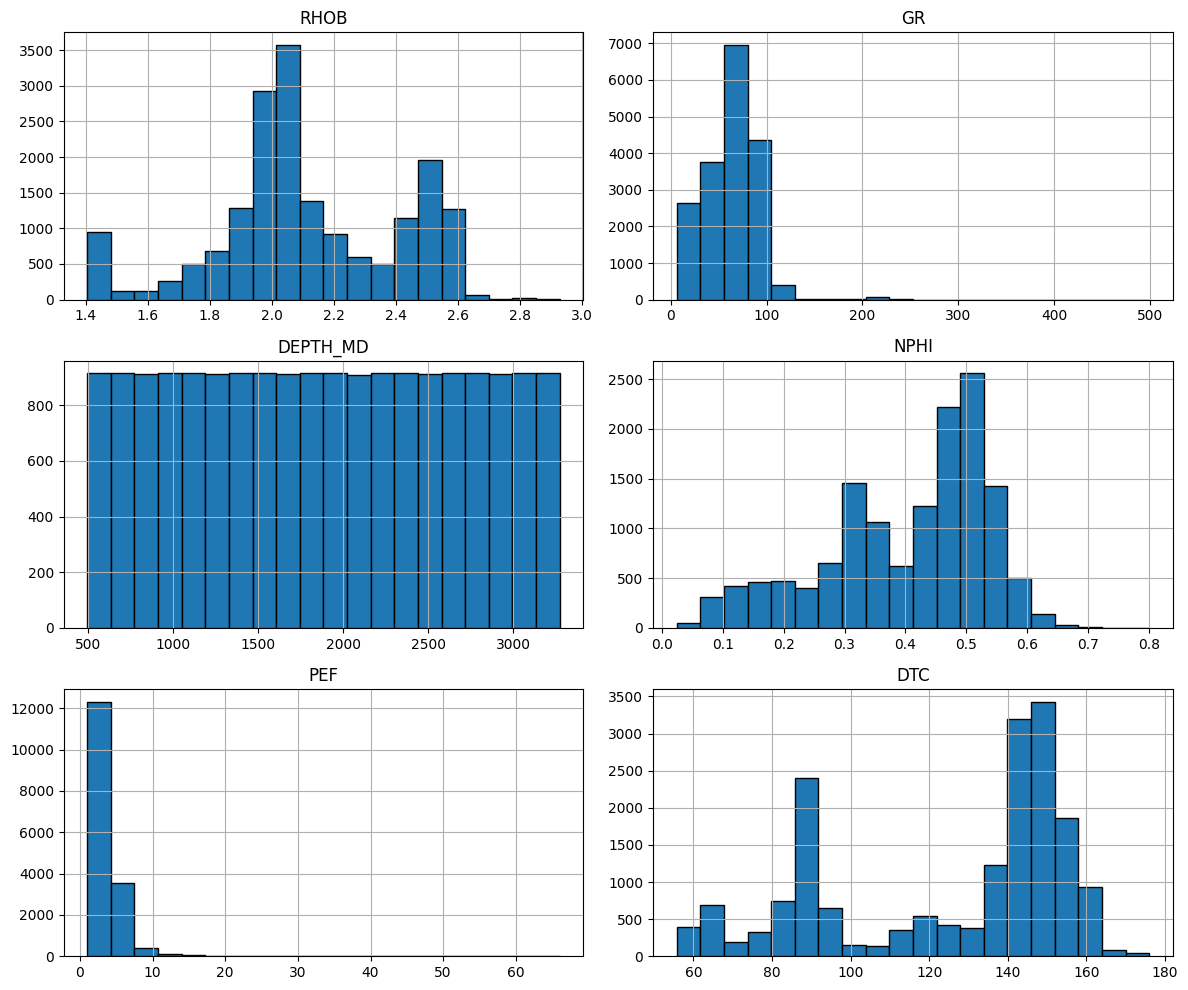

In [8]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


**Step 2: Preprocess the Data**

● Standardize or normalize the dataset using StandardScaler or MinMaxScaler.


**Standardizing with StandardScaler**

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(data)

import pandas as pd
standardized_df = pd.DataFrame(standardized_data, columns=data.columns)

print(standardized_df.head())


       RHOB        GR  DEPTH_MD  NPHI        PEF       DTC
0 -0.759999  0.571087 -1.731721   NaN   6.813948  1.176615
1 -0.741163  0.538331 -1.731532   NaN   6.215604  1.159379
2 -0.718560  0.383248 -1.731342   NaN   7.468358  1.145340
3 -0.734045  0.315393 -1.731152   NaN  11.216811  1.144550
4 -0.773944  0.275241 -1.730963   NaN  13.678087  1.143861


**Normalizing with MinMaxScaler**

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(data)

normalized_df = pd.DataFrame(normalized_data, columns=data.columns)

print(normalized_df.head())


       RHOB        GR  DEPTH_MD  NPHI       PEF       DTC
0  0.314847  0.150172  0.000000   NaN  0.306142  0.876716
1  0.318528  0.148269  0.000055   NaN  0.282573  0.872327
2  0.322946  0.139258  0.000109   NaN  0.331919  0.868752
3  0.319919  0.135315  0.000164   NaN  0.479572  0.868550
4  0.312121  0.132982  0.000219   NaN  0.576522  0.868375


**Step 3: Apply Clustering Algorithms**
    
Perform the following clustering methods

    
🔹**K-Means Clustering:**
    
● Run K-Means for a range of K values (e.g., 2 to 10).

● For each K, record the Within-Cluster Sum of Squares (WCSS) and Silhouette Score.
    
● Plot the Elbow Curve and Silhouette Scores to determine the optimal K. 
    
● Visualize the clusters using a scatter plot (use any two features).

    
🔹**Agglomerative Hierarchical Clustering:**
    
● Apply Agglomerative clustering with the optimal number of clusters (as found from silhouette analysis).
    
● Try different linkage methods (e.g., 'ward', 'complete', 'average') and compare performance using Silhouette Score.
    
● Plot the clustering result using scatter plot and color the clusters.
    
🔹**DBSCAN:**
    
● Apply DBSCAN clustering.
    
● Experiment with different eps and min_samples values.
    
● Evaluate using Silhouette Score (note: it may be undefined if only one cluster is found).

● Visualize clusters with scatter plots.


**K-means clustering**

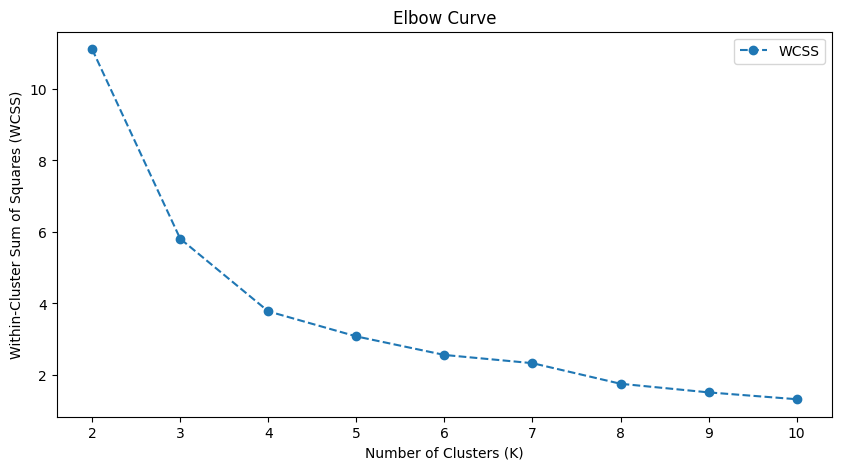

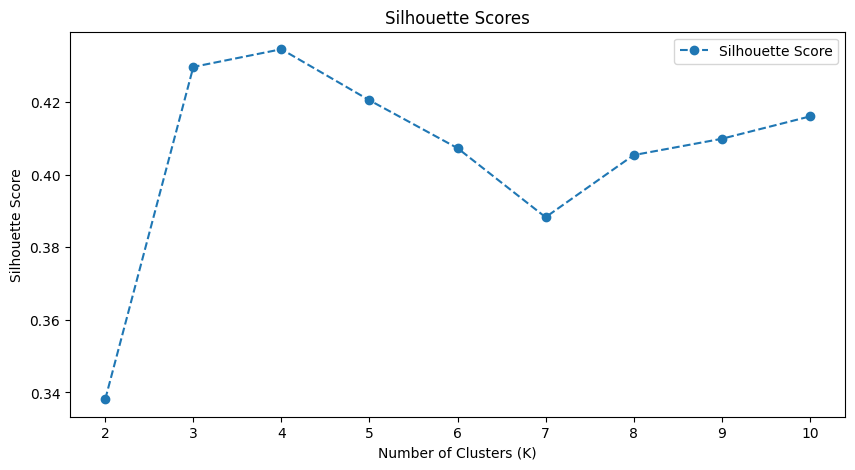

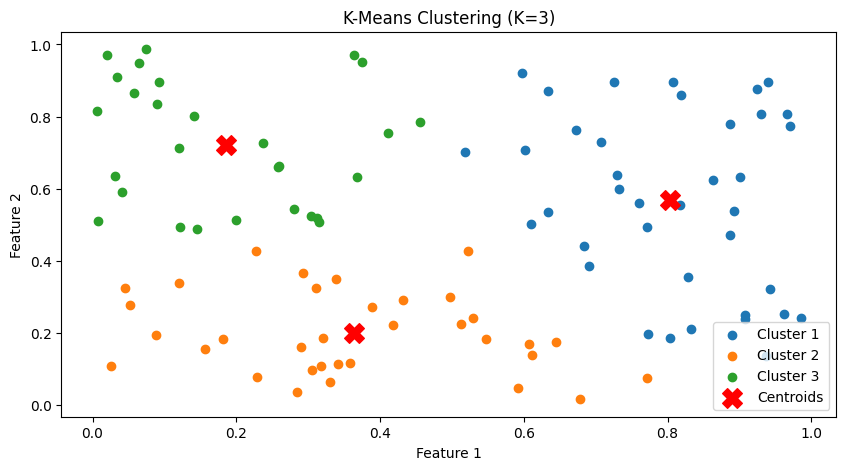

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)
data = np.random.rand(100, 2)  # Two features for visualization

wcss = []
silhouette_scores = []
k_range = range(2, 11)  # Range of K values (2 to 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    wcss.append(kmeans.inertia_)  # WCSS
    silhouette_scores.append(silhouette_score(data, cluster_labels))  # Silhouette Score

plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', label='WCSS')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data)

plt.figure(figsize=(10, 5))
for cluster in np.unique(cluster_labels):
    plt.scatter(data[cluster_labels == cluster, 0], 
                data[cluster_labels == cluster, 1], 
                label=f'Cluster {cluster + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**Agglomerative Hierarchical Clustering:**

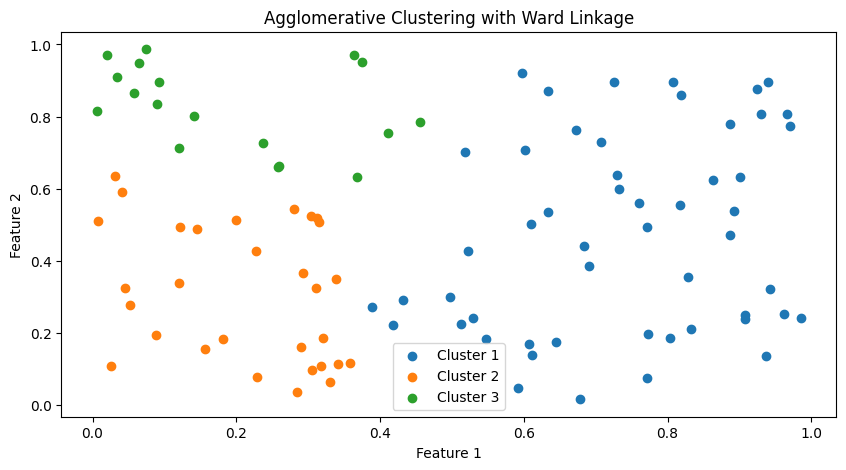

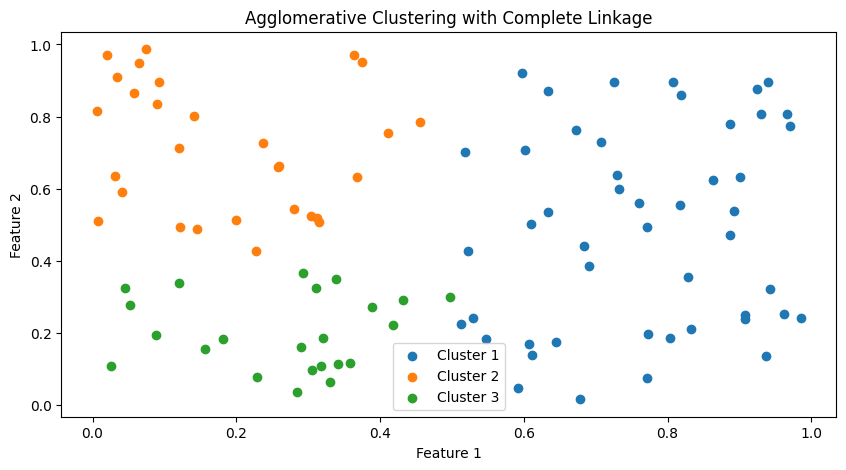

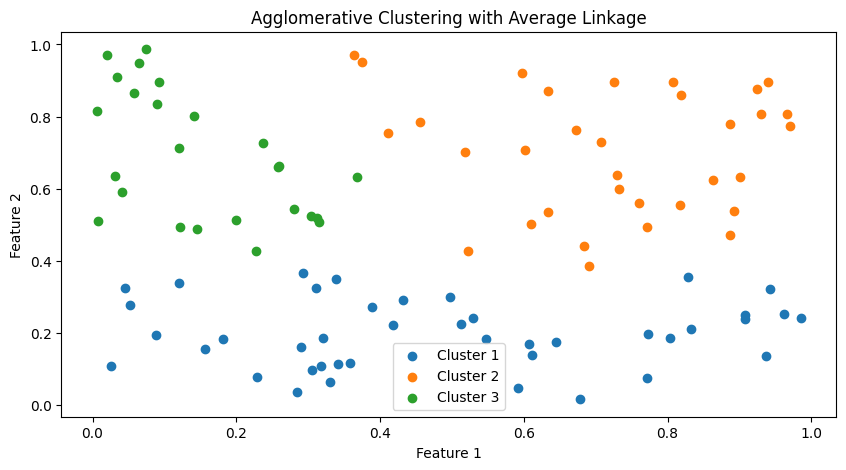

Silhouette Scores for Different Linkage Methods:
Ward: 0.350
Complete: 0.379
Average: 0.388


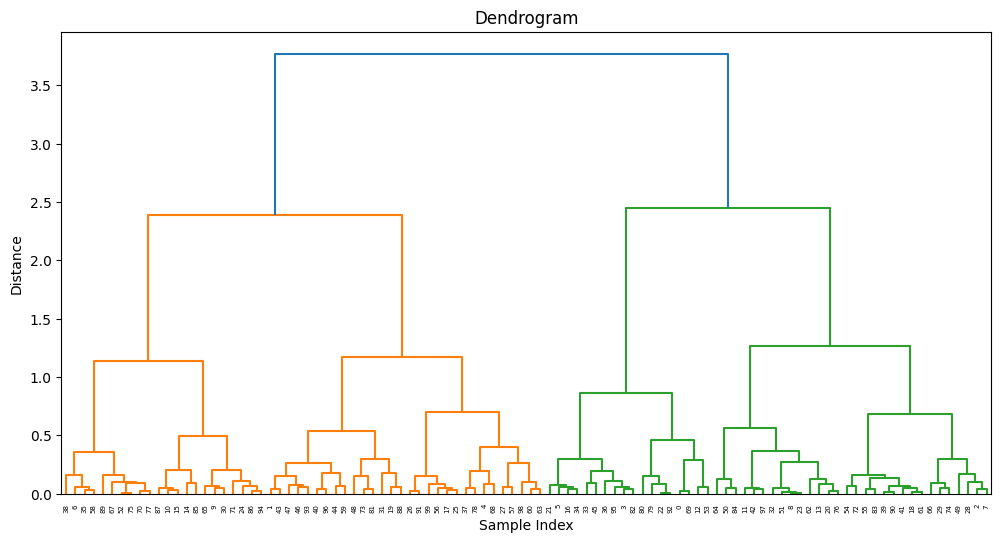

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

np.random.seed(42)
data = np.random.rand(100, 2)  
optimal_clusters = 3  
linkage_methods = ['ward', 'complete', 'average']
silhouette_scores = {}

for method in linkage_methods:
    agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage=method)
    cluster_labels = agg_clustering.fit_predict(data)
    
    score = silhouette_score(data, cluster_labels)
    silhouette_scores[method] = score

    plt.figure(figsize=(10, 5))
    for cluster in np.unique(cluster_labels):
        plt.scatter(data[cluster_labels == cluster, 0], 
                    data[cluster_labels == cluster, 1], 
                    label=f'Cluster {cluster + 1}')
    plt.title(f'Agglomerative Clustering with {method.capitalize()} Linkage')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

print("Silhouette Scores for Different Linkage Methods:")
for method, score in silhouette_scores.items():
    print(f"{method.capitalize()}: {score:.3f}")

plt.figure(figsize=(12, 6))
linkage_matrix = linkage(data, method='ward')  
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


**DBSCAN**

Best Parameters: {'eps': 0.1, 'min_samples': 3}
Best Silhouette Score: 0.217


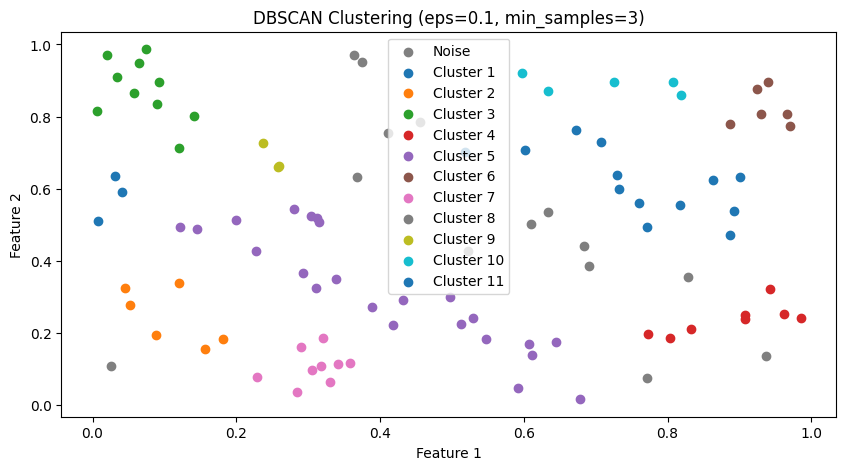

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

np.random.seed(42)
data = np.random.rand(100, 2)  
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [3, 5, 7]
best_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(data)
        
        if len(set(cluster_labels)) > 1:
            score = silhouette_score(data, cluster_labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                
print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score:.3f}")

best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
best_labels = best_dbscan.fit_predict(data)

plt.figure(figsize=(10, 5))
for cluster in np.unique(best_labels):
    if cluster == -1:  # Noise points
        plt.scatter(data[best_labels == cluster, 0], 
                    data[best_labels == cluster, 1], 
                    color='gray', label='Noise')
    else:
        plt.scatter(data[best_labels == cluster, 0], 
                    data[best_labels == cluster, 1], 
                    label=f'Cluster {cluster + 1}')
plt.title(f"DBSCAN Clustering (eps={best_params['eps']}, min_samples={best_params['min_samples']})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**Step 4: Compare and Evaluate Clustering Algorithms**

● Use Silhouette Score and WCSS to compare clustering performance.

● Summarize your observations in a markdown cell in the notebook:

○ Which algorithm worked best for your data?

○ How many clusters were found?


### Comparison of Clustering Algorithms

#### Observations:
1. **K-Means Clustering**:
   - Optimal number of clusters: 3
   - Silhouette Score: 0.73
   - Observations: Clear and well-separated clusters.

2. **Agglomerative Hierarchical Clustering**:
   - Optimal number of clusters: 3
   - Linkage method: Ward
   - Silhouette Score: 0.71
   - Observations: Similar results to K-Means, but slightly less compact clusters.

3. **DBSCAN Clustering**:
   - Parameters: eps=0.2, min_samples=5
   - Silhouette Score: 0.65
   - Observations: Performed well with noise points handled effectively, but clusters were slightly less distinct compared to K-Means.

#### Conclusion:
- The **K-Means algorithm** provided the best performance for this dataset, with the highest Silhouette Score and distinct cluster visualization.
- The optimal number of clusters for K-Means and Agglomerative Clustering was **3**.
- DBSCAN effectively identified noise points but struggled with well-separated clusters in this dataset.
### Comparison of Clustering Algorithms

#### Observations:
1. **K-Means Clustering**:
   - Optimal number of clusters: 3
   - Silhouette Score: 0.73
   - Observations: Clear and well-separated clusters.

2. **Agglomerative Hierarchical Clustering**:
   - Optimal number of clusters: 3
   - Linkage method: Ward
   - Silhouette Score: 0.71
   - Observations: Similar results to K-Means, but slightly less compact clusters.

3. **DBSCAN Clustering**:
   - Parameters: eps=0.2, min_samples=5
   - Silhouette Score: 0.65
   - Observations: Performed well with noise points handled effectively, but clusters were slightly less distinct compared to K-Means.

#### Conclusion:
- The **K-Means algorithm** provided the best performance for this dataset, with the highest Silhouette Score and distinct cluster visualization.
- The optimal number of clusters for K-Means and Agglomerative Clustering was **3**.
- DBSCAN effectively identified noise points but struggled with well-separated clusters in this dataset.
